In [302]:
%matplotlib inline
import numpy as np
import scipy as sci
import scipy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [303]:
#Brechungsindex
n=1.37927
#Laserfrequenz
wl=532e-9
#vi=1.959e-3
vi=0.89454
pi=np.pi
kB=const.Boltzmann
def calcq(angel):
    return 4*np.pi*n/wl*np.sin(angel/180*np.pi/2)
g =lambda tau,D: np.exp(-2*q**2*D*tau)
def g2(tau,D,C,q):
    return np.exp(-2*q**2*D*tau)*C


In [304]:
def chisquared(func,xdata,ydata,parms,labels,popt,perr):
    chisq=0
    sin=np.sin
    cos=np.cos
    exp=np.exp
    sqrt=np.sqrt
    
    angle=labels
    q=calcq(angle)
    dangle=1
    
    D,C=popt
    dD,dC=perr
    dq=pi**2*sqrt(dangle**2*cos(pi*angle/360)**2)/90
    
    for x in range(len(xdata)):
        t=xdata[x]
        dt=0
        ferror=sqrt((4*C**2*D**2*dq**2*q**2*t**2 + C**2*D**2*dt**2*q**4 + C**2*dD**2*q**4*t**2 + dC**2)*exp(2*D*q**2*t))
        ferror=np.abs(ferror)
       # print(ferror)
        chisq+=(func(xdata[x],*parms)-ydata[x])**2/(ferror)
    return chisq/len(popt)

In [305]:

def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    sci.optimize.curve_fit(g,time,corr,)
    ax.plot(time,np.abs(corr),".",label=r"{} $^\circ$".format(labels))
    ax.loglog()
    ax.set_title(name)

In [306]:
#Alles in einen plot :D
namelist=[]
angels=[]

for x in range(2,16):
    namelist.append("Data/A/{}.ASC".format(x*10))
    angels.append(x*10)
"""
fig,ax=plt.subplots(dpi=144)
for x in range(len(namelist)):
    plotcorr(namelist[x],angels[x],ax)
ax.legend()"""

'\nfig,ax=plt.subplots(dpi=144)\nfor x in range(len(namelist)):\n    plotcorr(namelist[x],angels[x],ax)\nax.legend()'

In [307]:

def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    lin=np.linspace(0,time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time,D,C:g2(time,D,C,q),time,corr,p0=(1e-15,1))
    print(popt)
    fig,ax=plt.subplots(dpi=144)
    D=popt[0]
    a=const.Boltzmann*300/(6*np.pi*vi*D)
    perr = np.sqrt(np.diag(pcov))
    dD=perr[0]
    da=50*np.sqrt(dD**2*kB**2/(D**4*vi**2))/pi
    chisq=(chisquared(g2,time,corr,(*popt,q),labels,popt,perr))
    ax.plot(time,(np.abs(corr)),".",label="experimantal data")
    ax.plot(time,g2(time,*popt,q),label="Fit parameters"  "\n" r"$D_0=$ {:.2e} $m^2/s$" "\n" r"a   = {:.2e}m " "\n" r"$\chi ^2$ = {:4.2f}".format(D,a,chisq))
    ax.semilogx()
    

    

    ax.legend(loc=0,frameon=False)
    ax.set_title(r"Sample A: {} $^\circ$".format(labels))
    fig.savefig("Plots/A/{}".format(labels))
    return(popt[0],perr[0],a,da)

[3.98503041e-15 5.86826984e-01]


C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


[4.02716295e-15 5.65498192e-01]
[3.88603200e-15 5.55666443e-01]
[4.03816483e-15 5.44648534e-01]
[3.96739950e-15 5.48671443e-01]
[3.93890897e-15 5.52500189e-01]
[3.83539964e-15 5.62902528e-01]
[4.05086342e-15 5.61366551e-01]
[3.95729298e-15 5.32545173e-01]
[3.91840973e-15 5.56474834e-01]
[3.88558179e-15 5.50520760e-01]
[3.83680232e-15 5.11592337e-01]
[3.86257499e-15 4.48985449e-01]
[3.84196036e-15 4.13825486e-01]


,0,1,2,3
0,3.985030e-15,2.553561e-17,6.164131e-08,3.949904e-10
1,4.027163e-15,1.240498e-17,6.099641e-08,1.878889e-10
2,3.886032e-15,1.487873e-17,6.321165e-08,2.420230e-10
3,4.038165e-15,1.446126e-17,6.083023e-08,2.178420e-10
4,3.967399e-15,2.218968e-17,6.191524e-08,3.462922e-10
5,3.938909e-15,2.139492e-17,6.236308e-08,3.387367e-10
6,3.835400e-15,2.727659e-17,6.404613e-08,4.554832e-10
7,4.050863e-15,5.722025e-17,6.063954e-08,8.565605e-10
8,3.957293e-15,4.054577e-17,6.207337e-08,6.359935e-10
9,3.918410e-15,2.904259e-17,6.268933e-08,4.646427e-10


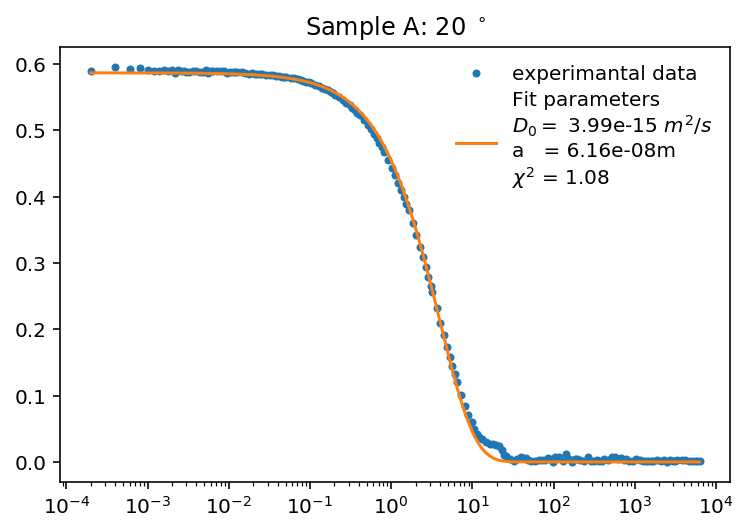

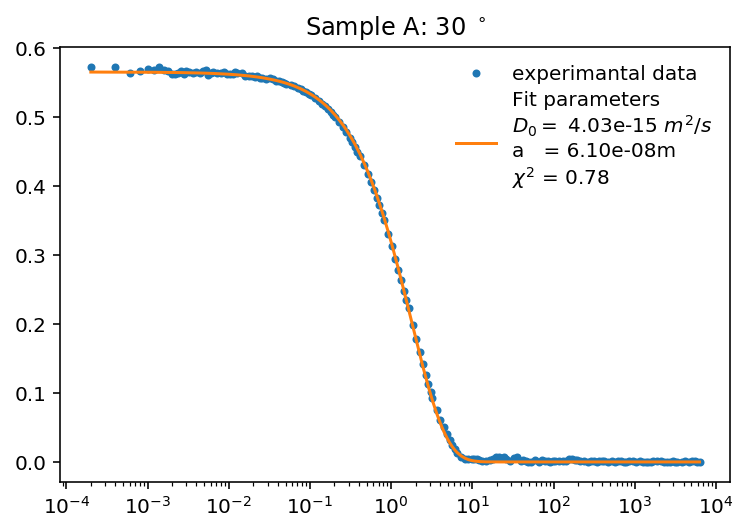

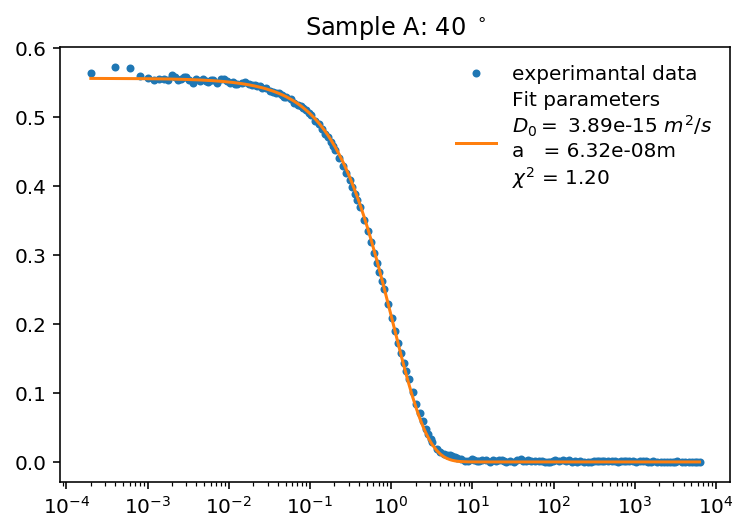

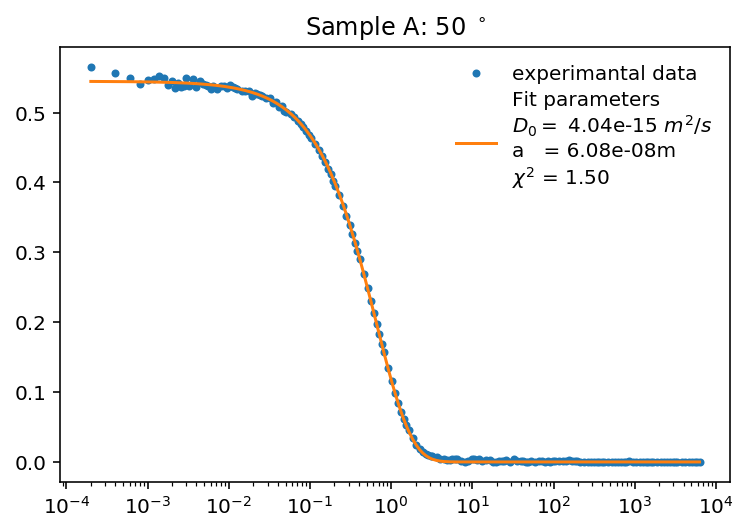

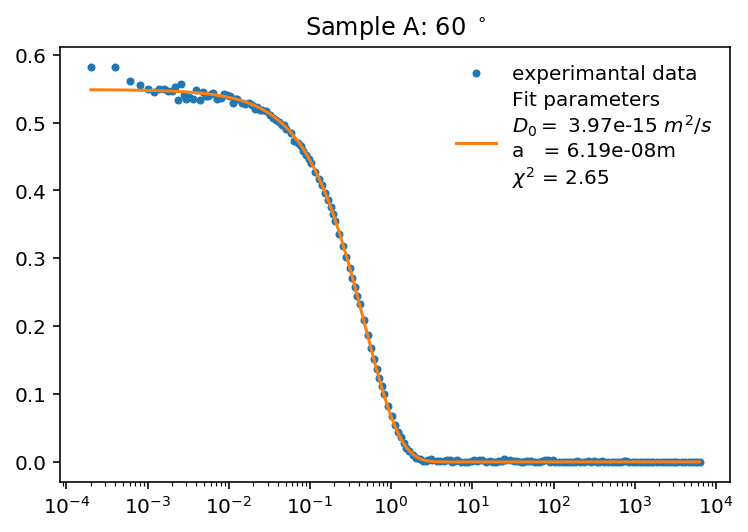

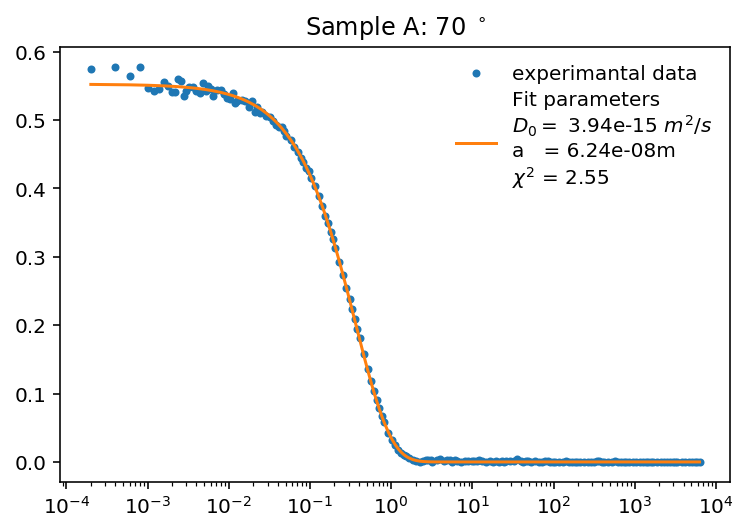

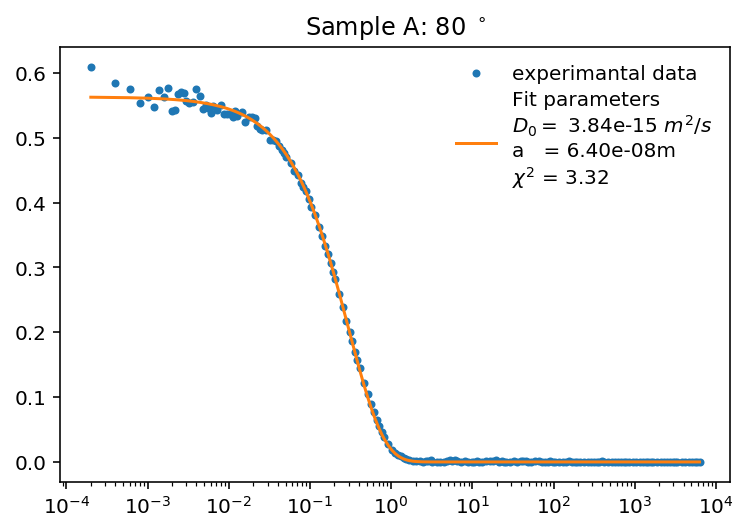

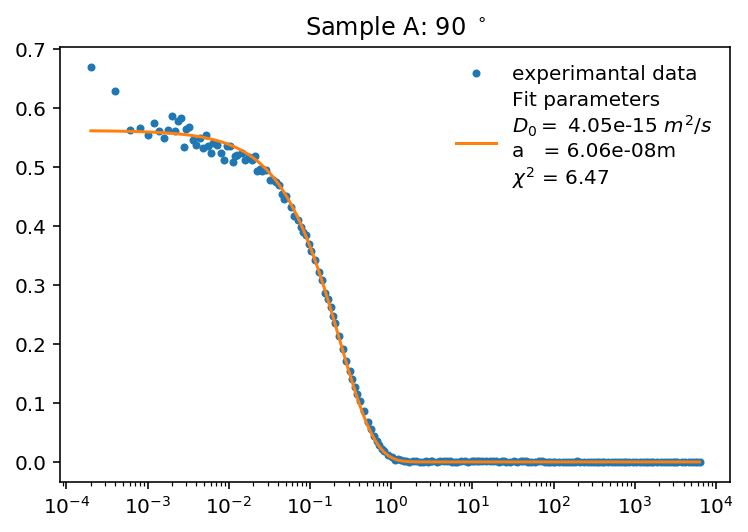

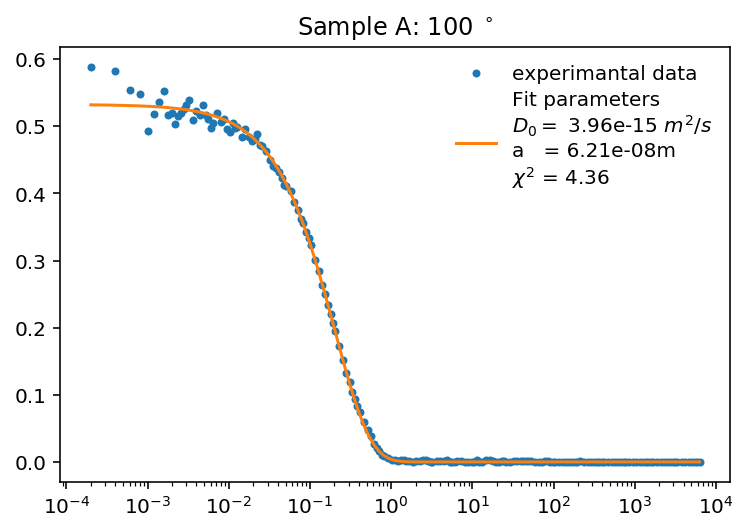

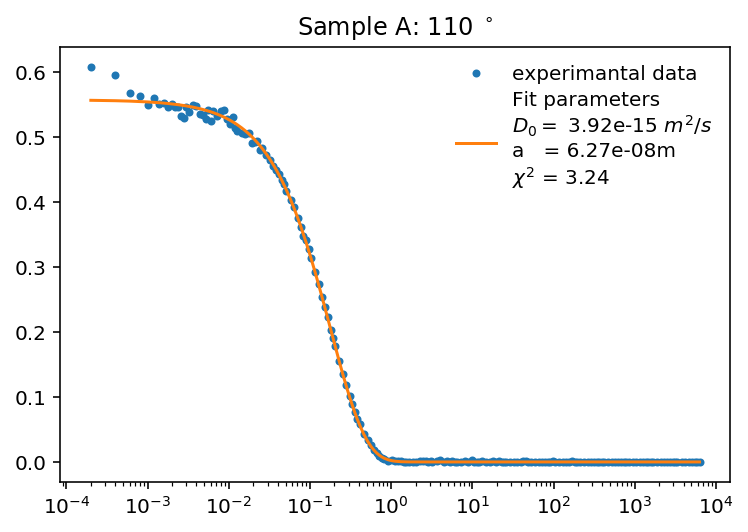

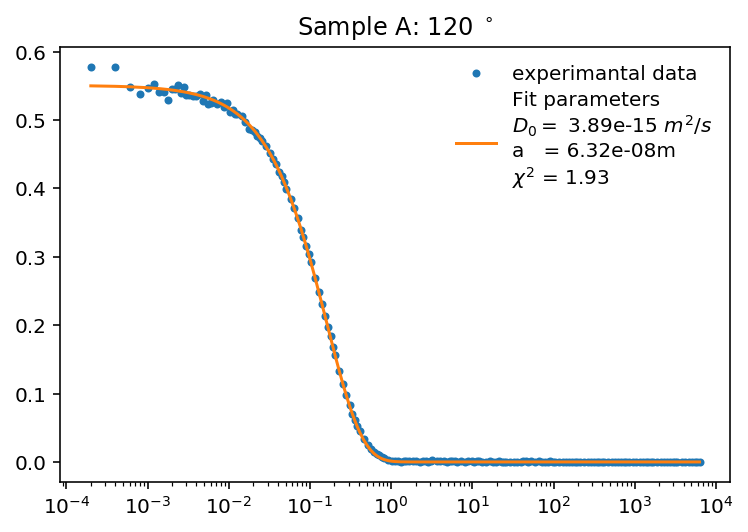

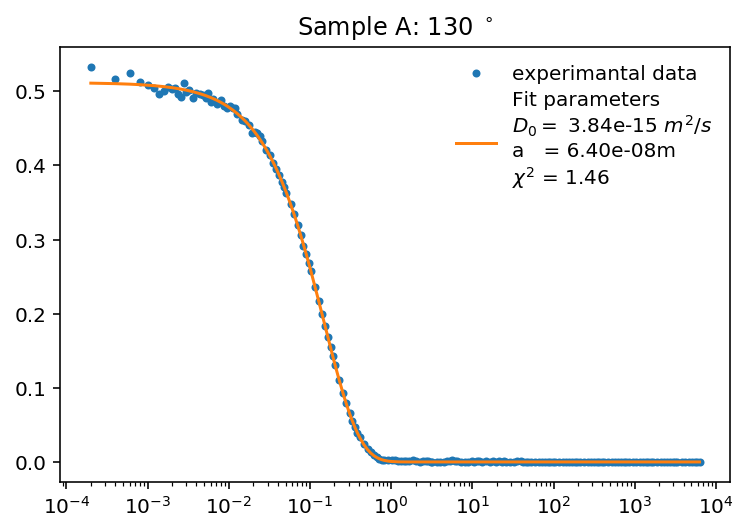

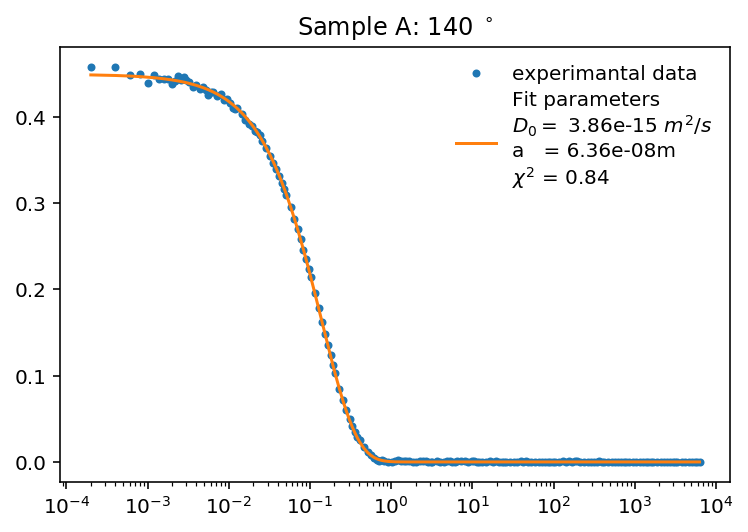

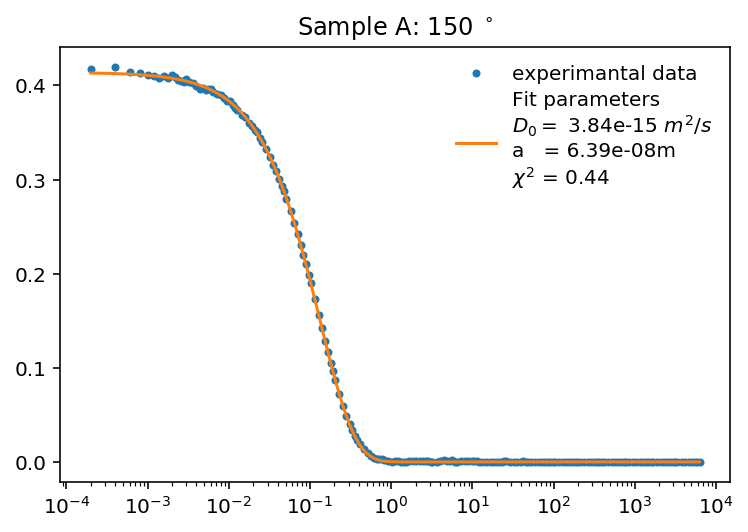

In [308]:
ax=0
#Viele Plots
namelist=[]
Ds=[]
resultListA=[]
for x in range(2,16):
     namelist.append("Data/A/{}.ASC".format(x*10))
for x in range(len(namelist)):
    result=plotcorr(namelist[x],angels[x],ax)
    Ds.append(result[0])
    resultListA.append(result)
#plotcorr(namelist[0],angels[0],ax)
#ax.legend()

mean=np.mean(Ds)
pd.DataFrame(resultListA)

In [309]:
print(n)
print(mean)
print(const.Boltzmann*300/(6*np.pi*vi*mean))

1.37927
3.930827419635001e-15
6.249129453670802e-08


In [310]:
#B
def plotcorr(name,labels,ax):
    #getting data
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    D=1
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    lin=np.linspace(0,time[182],1000)
    #fitten
    popt,pcov=sci.optimize.curve_fit(lambda time,D,C:g2(time,D,C,q) ,time,corr , p0=(1e-15,1))
    print(popt)
    fig,ax=plt.subplots(dpi=144)
    D=popt[0]
    a=const.Boltzmann*300/(6*np.pi*vi*D)
    perr = np.sqrt(np.diag(pcov))
    dD=perr[0]
    da=50*np.sqrt(dD**2*kB**2/(D**4*vi**2))/pi
    
    #chiquadrat berechnen
    chisq=(chisquared(g2,time,corr,(*popt,q),labels,popt,perr))
    
    
    #plotten
    ax.plot(time,(np.abs(corr)),".",label="Fit parameters"  "\n" r"$D_0=$ {:.2e} $m^2/s$" "\n" r"a   = {:.2e}m " "\n" r"$\chi ^2$ = {:4.2f}".format(D,a,chisq))
    ax.plot(time,g2(time,*popt,q))
    ax.semilogx()
    ax.set_title(r"Sample B:  {} $^\circ$".format(labels))
    ax.legend()
    fig.savefig("Plots/B/{}".format(labels))
    return(popt[0],perr[0],a,da)

[4.80317333e-15 5.80166738e-01]


C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


[4.73256295e-15 5.64297570e-01]
[4.54118841e-15 5.63508937e-01]
[4.81593280e-15 5.52084063e-01]
[4.74943779e-15 5.35686202e-01]
[4.86080409e-15 5.47119486e-01]
[4.96966462e-15 5.46484332e-01]
[4.94900161e-15 5.34167615e-01]
[4.92843464e-15 5.32712107e-01]
[4.96604642e-15 5.08051356e-01]
[4.74672303e-15 4.97255157e-01]
[4.80974270e-15 4.84262739e-01]
[4.74414394e-15 4.60881393e-01]
[4.77514347e-15 4.22048917e-01]
4.813714271689356e-15
3.309585955878616e-08


,0,1,2,3
0,4.803173e-15,5.784254e-17,5.114171e-08,6.158775e-10
1,4.732563e-15,2.585155e-17,5.190475e-08,2.835288e-10
2,4.541188e-15,3.091182e-17,5.409212e-08,3.682045e-10
3,4.815933e-15,2.688908e-17,5.100621e-08,2.847860e-10
4,4.749438e-15,3.697963e-17,5.172033e-08,4.027000e-10
5,4.860804e-15,5.715524e-17,5.053536e-08,5.942146e-10
6,4.969665e-15,8.019983e-17,4.942838e-08,7.976691e-10
7,4.949002e-15,8.582523e-17,4.963476e-08,8.607624e-10
8,4.928435e-15,4.944792e-17,4.984189e-08,5.000732e-10
9,4.966046e-15,7.135663e-17,4.946440e-08,7.107490e-10


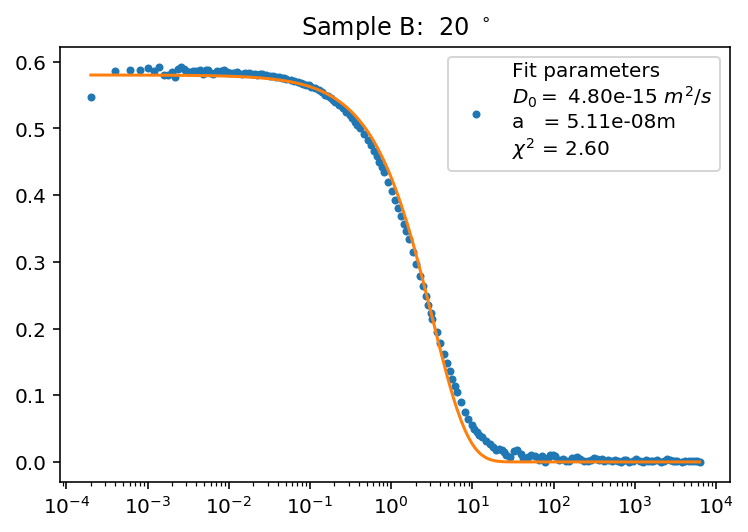

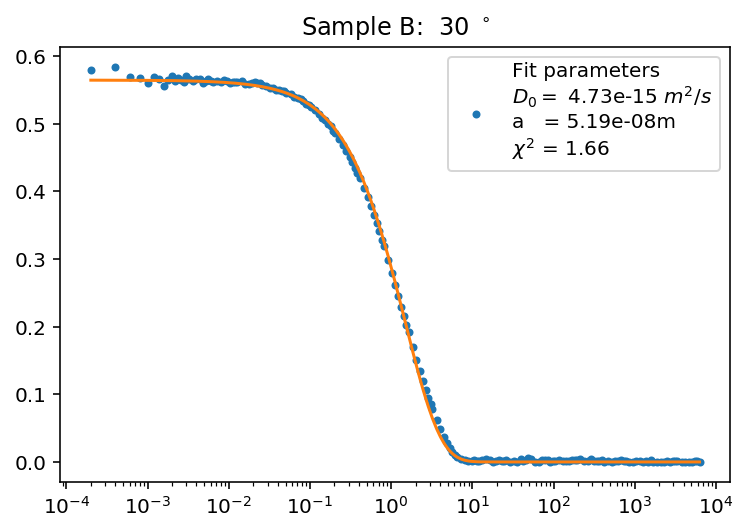

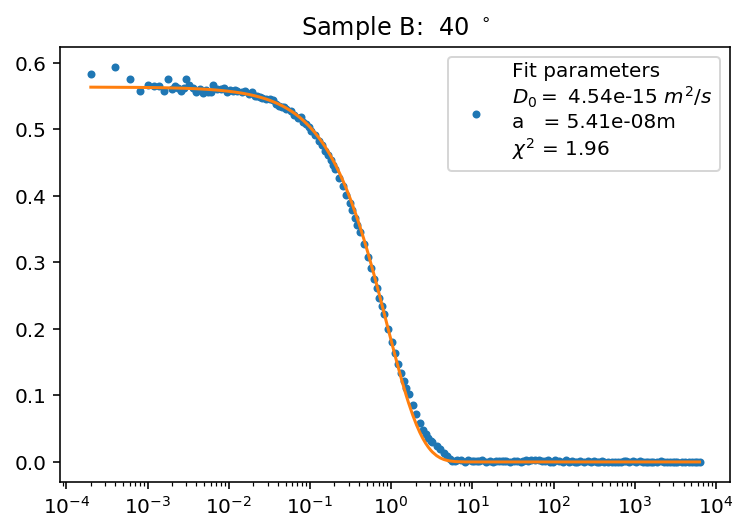

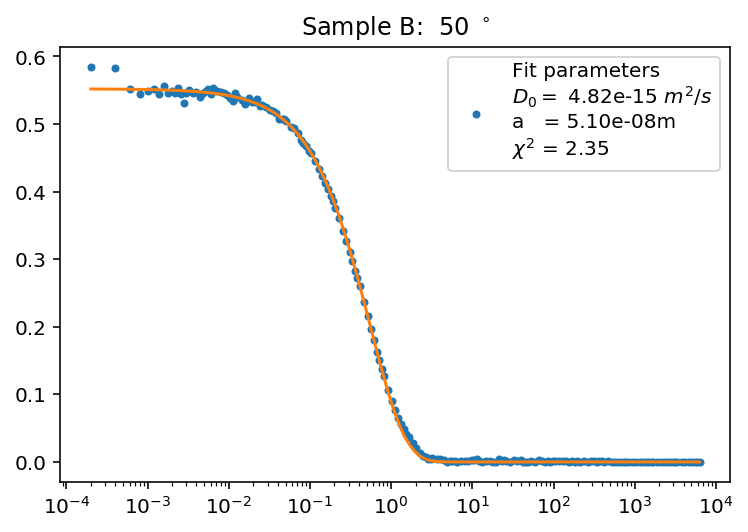

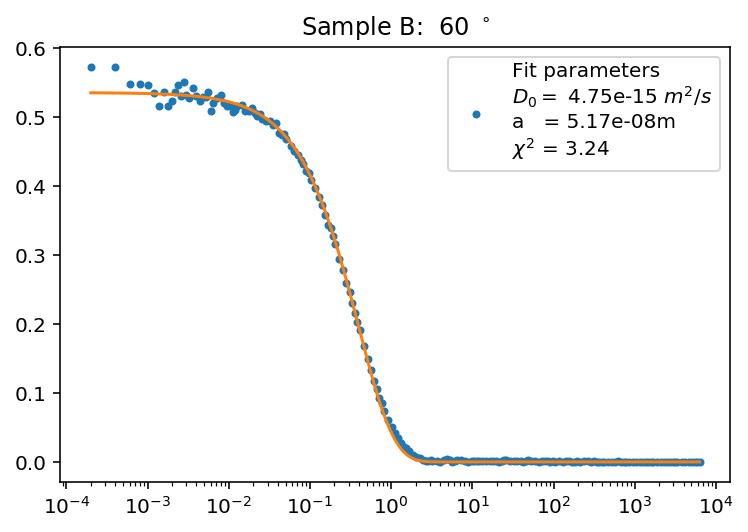

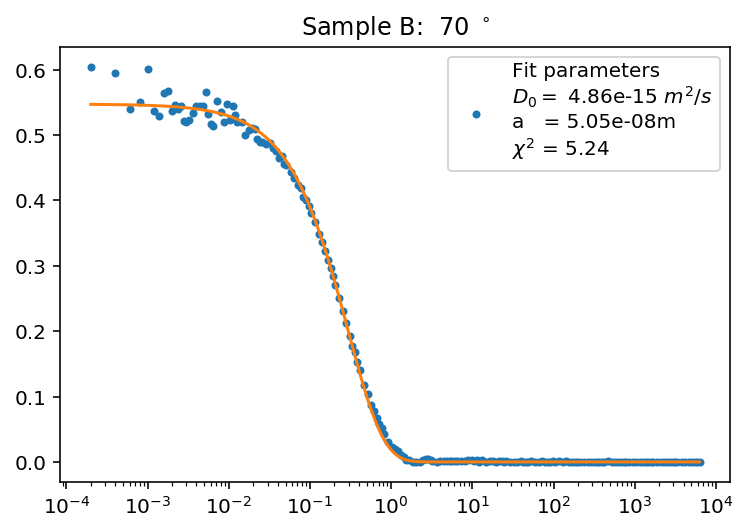

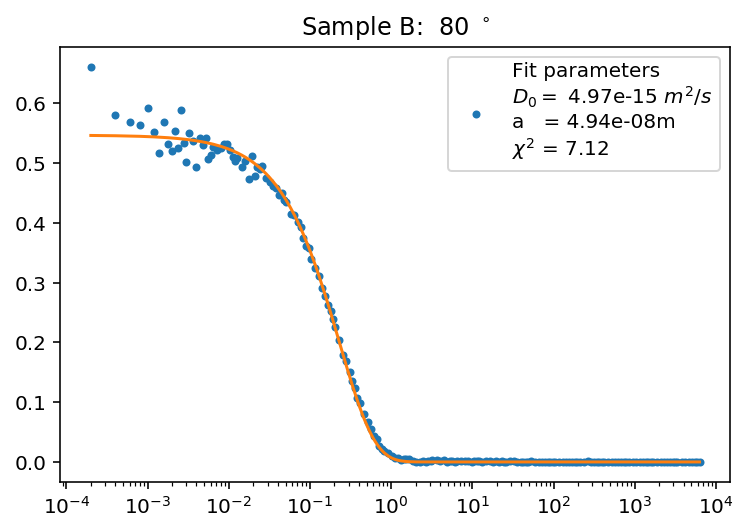

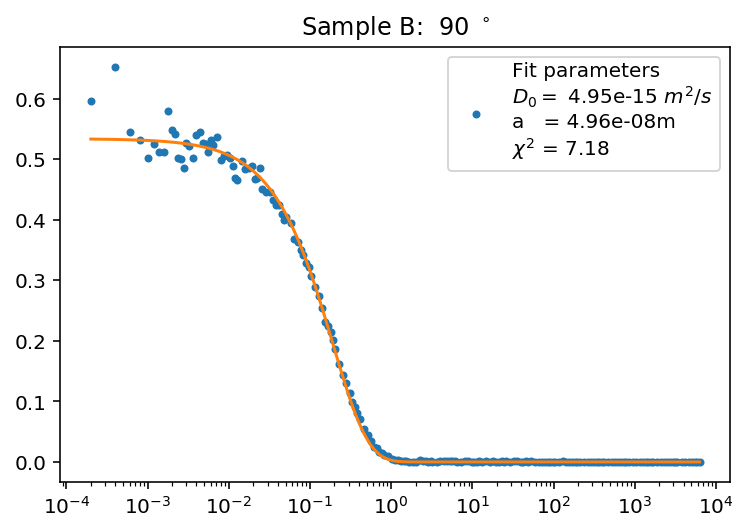

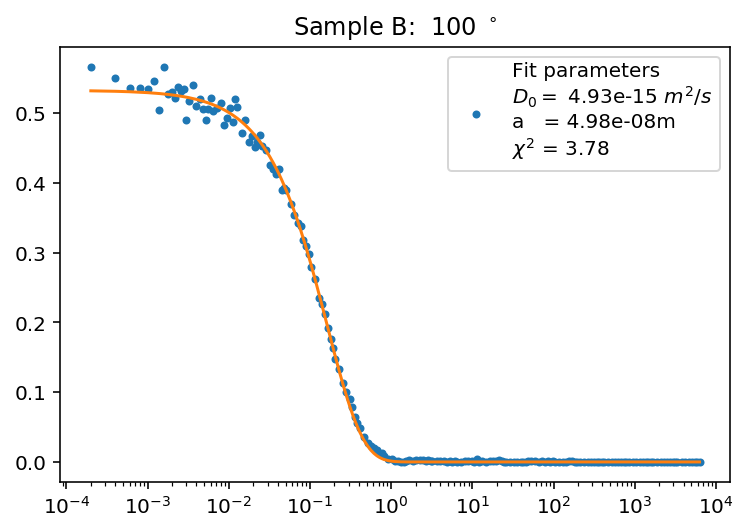

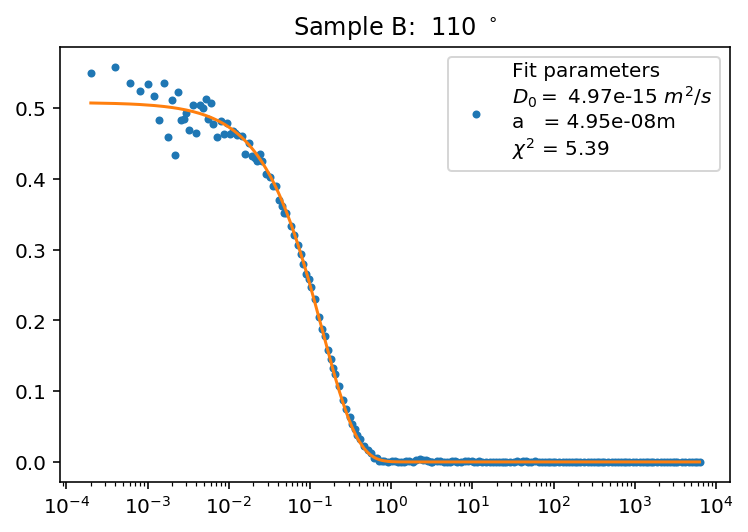

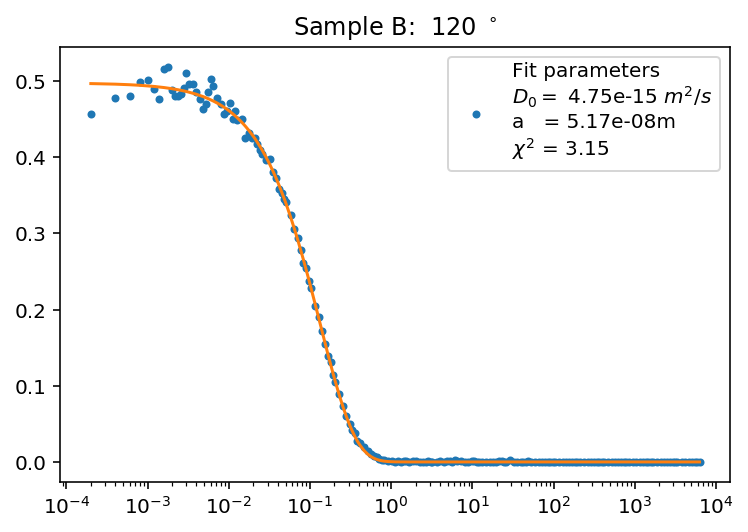

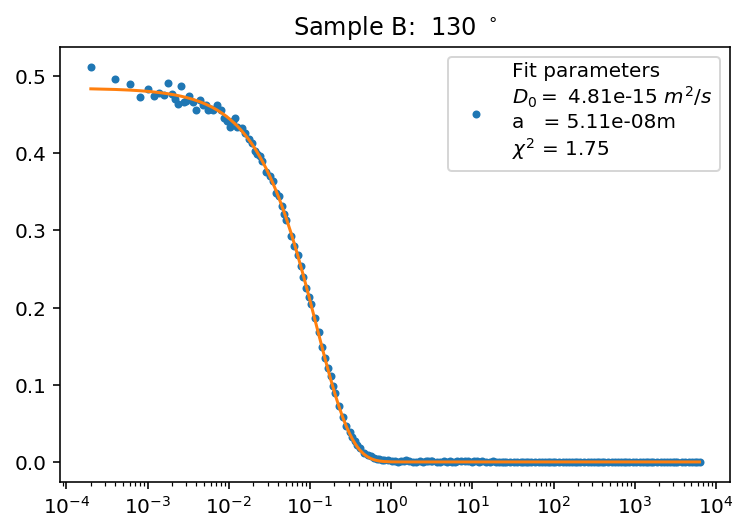

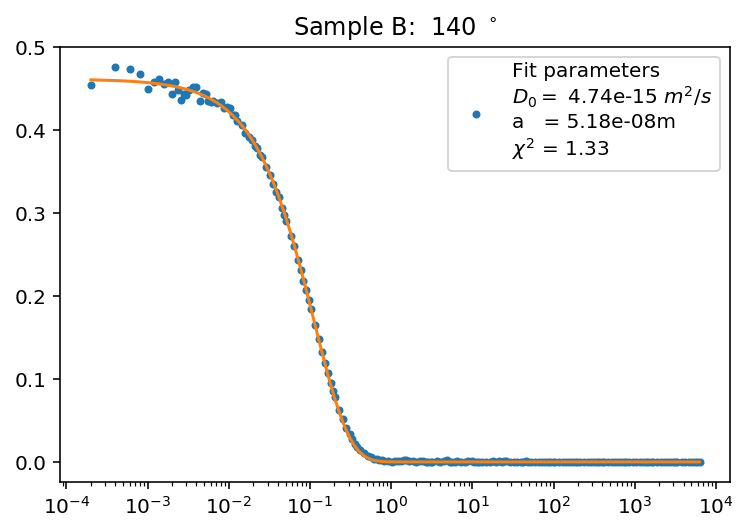

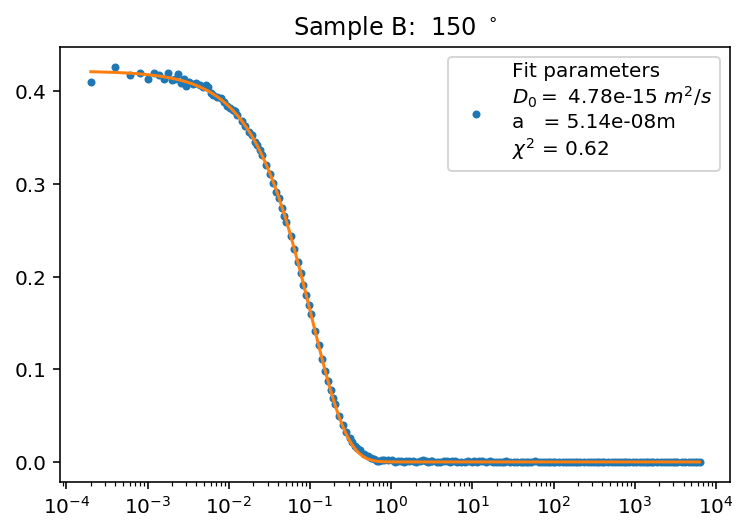

In [311]:
#Viele Plots BL
namelist=[]
Ds=[]
dDs=[]
aList=[]
daList=[]
resultListB=[]
for x in range(2,16):
     namelist.append("Data/B/{}.ASC".format(x*10))
for x in range(len(namelist)):
    result=(plotcorr(namelist[x],angels[x],ax))
    resultListB.append(result)
    Ds.append(result[0])
    dDs.append(result[1])
    aList.append(result[2])
    daList.append(result)
    
    
#plotcorr(namelist[0],angels[0],ax)
mean=np.mean(Ds)
print(mean)
print(const.Boltzmann*300/(6*np.pi*n*mean))
pd.DataFrame(resultListB)

In [312]:
print(const.Boltzmann*300/(6*np.pi*vi*mean))

5.1029720542007044e-08


In [313]:
#B
def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    D=1
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    lin=np.linspace(0,time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time,D,C:g2(time,D,C,q) ,time,corr , p0=(1e-17,.3))
    print(popt)
    fig,ax=plt.subplots(dpi=144)
    D=popt[0]
    a=const.Boltzmann*300/(6*np.pi*vi*D)
    perr = np.sqrt(np.diag(pcov))
    dD=perr[0]
    da=50*np.sqrt(dD**2*kB**2/(D**4*vi**2))/pi
    
        
    #chiquadrat berechnen
    chisq=(chisquared(g2,time,corr,(popt[0],popt[1],calcq(40)),labels,popt[:2],perr[:2]))
    
    #plotten
    ax.plot(time,(np.abs(corr)),".",label="Fit parameters"  "\n" r"$D_0=$ {:.2e} $m^2/s$" "\n" r"a   = {:.2e}m " "\n" r"$\chi ^2$ = {:4.2f}".format(D,a,chisq))

    ax.plot(time,g2(time,*popt,q))
    ax.semilogx()
    ax.set_title(r"Sample C {} $^\circ$".format(labels))
    ax.legend()
    fig.savefig(r"Plots/C bei 40")
    return(popt[0],perr[0],a,da)

[3.81102249e-15 5.29786396e-01]


C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


3.811022485548979e-15
6.44557976198857e-08


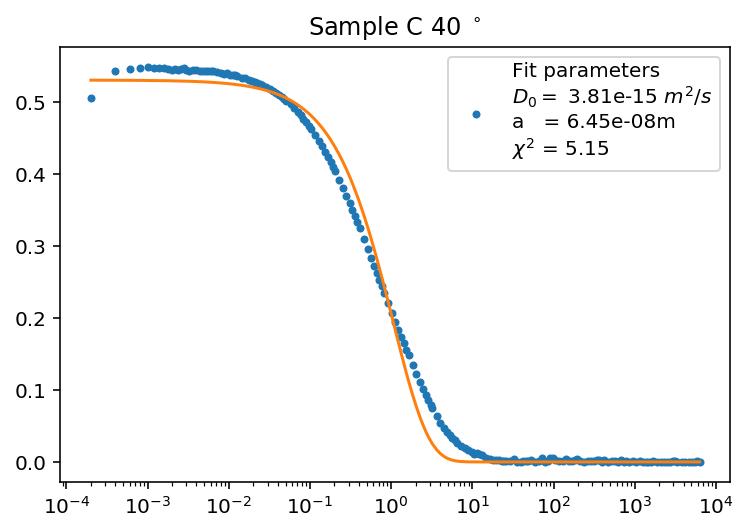

In [314]:
#C
#def g2(tau,D,C,k2,q):
 #   return np.exp(-2*q**2*D*tau-k2*tau**2)*C



resultC=plotcorr("Data/C.ASC",40,0)
mean=resultC[0]

#plotcorr(namelist[0],angels[0],ax)
print(mean)
print(const.Boltzmann*300/(6*np.pi*vi*mean))

In [315]:
#B
def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    fig,ax=plt.subplots(dpi=300)
    ax.plot(time,(np.abs(corr)),".",label=r"{} $^\circ$".format(labels))
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    grenze=100
    time2=time[grenze:]
    corr2=corr[grenze:]
    A=0
    lin=np.linspace(time[100],time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time2,D,C:g2(time2,D,C,q,A) ,time2,corr2 , p0=(1e-18,.4))
    print(popt)
    D=popt[0]
    popt2=popt
    a=const.Boltzmann*300/(6*np.pi*vi*D)
    perr = np.sqrt(np.diag(pcov))
    dD=perr[0]
    da=50*np.sqrt(dD**2*kB**2/(D**4*vi**2))/pi
        
    #chiquadrat berechnen
    chisq=(chisquared(g2,time2,corr2,(*popt,q,A),labels,popt,perr))
    
    ax.plot(time2,g2(time2,*popt,q,A),label="Fit parameters"  "\n" r"$D_0=$ {:.2e} $m^2/s$" "\n" r"a   = {:.2e}m " "\n" r"$\chi ^2$ = {:4.2f}".format(D,a,chisq))
    time1=time[:grenze]
    corr1=corr[:grenze]
    A=popt[1]
    lin=np.linspace(0,time[grenze-1],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time1,D,C:g2(time1,D,C,q,A) ,time1,corr1 , p0=(1e-18,.4))
    print(popt)
    D=popt[0]
    a=const.Boltzmann*300/(6*np.pi*vi*D)
    perr = np.sqrt(np.diag(pcov))
    dD=perr[0]
    da=50*np.sqrt(dD**2*kB**2/(D**4*vi**2))/pi
    
        
    #chiquadrat berechnen
    chisq=(chisquared(g2,time1,corr1,(*popt,q,A),labels,popt,perr))
    
    ax.plot(time1,g2(time1,*popt,q,A),label="Fit parameters"  "\n" r"$D_0=$ {:.2e} $m^2/s$" "\n" r"a   = {:.2e}m " "\n" r"$\chi ^2$ = {:4.2f}".format(D,a,chisq))
    
    

  
    
    ax.loglog()
    #ax.semilogx()
    ax.set_title(r"D {} $^\circ$".format(labels))
    ax.legend()
    fig.savefig(r"Plots/D bei 40")
    fig,ax=plt.subplots(dpi=300)
    ax.plot(time2,(np.abs(corr2)),".",label=r"{} $^\circ$".format(labels))
    ax.plot(time2,g2(time2,*popt2,q,0))
    ax.semilogx()
    ax.set_title("Second Part")
    fig.savefig(r"Plots/D nur der letzte Teil")
   #ax.semilogy()
    return(popt[0])

[4.25229222e-19 1.62260977e-01]
[1.60509024e-14 2.66472146e-01]
1.6050902378017728e-14
1.5303967856025015e-08


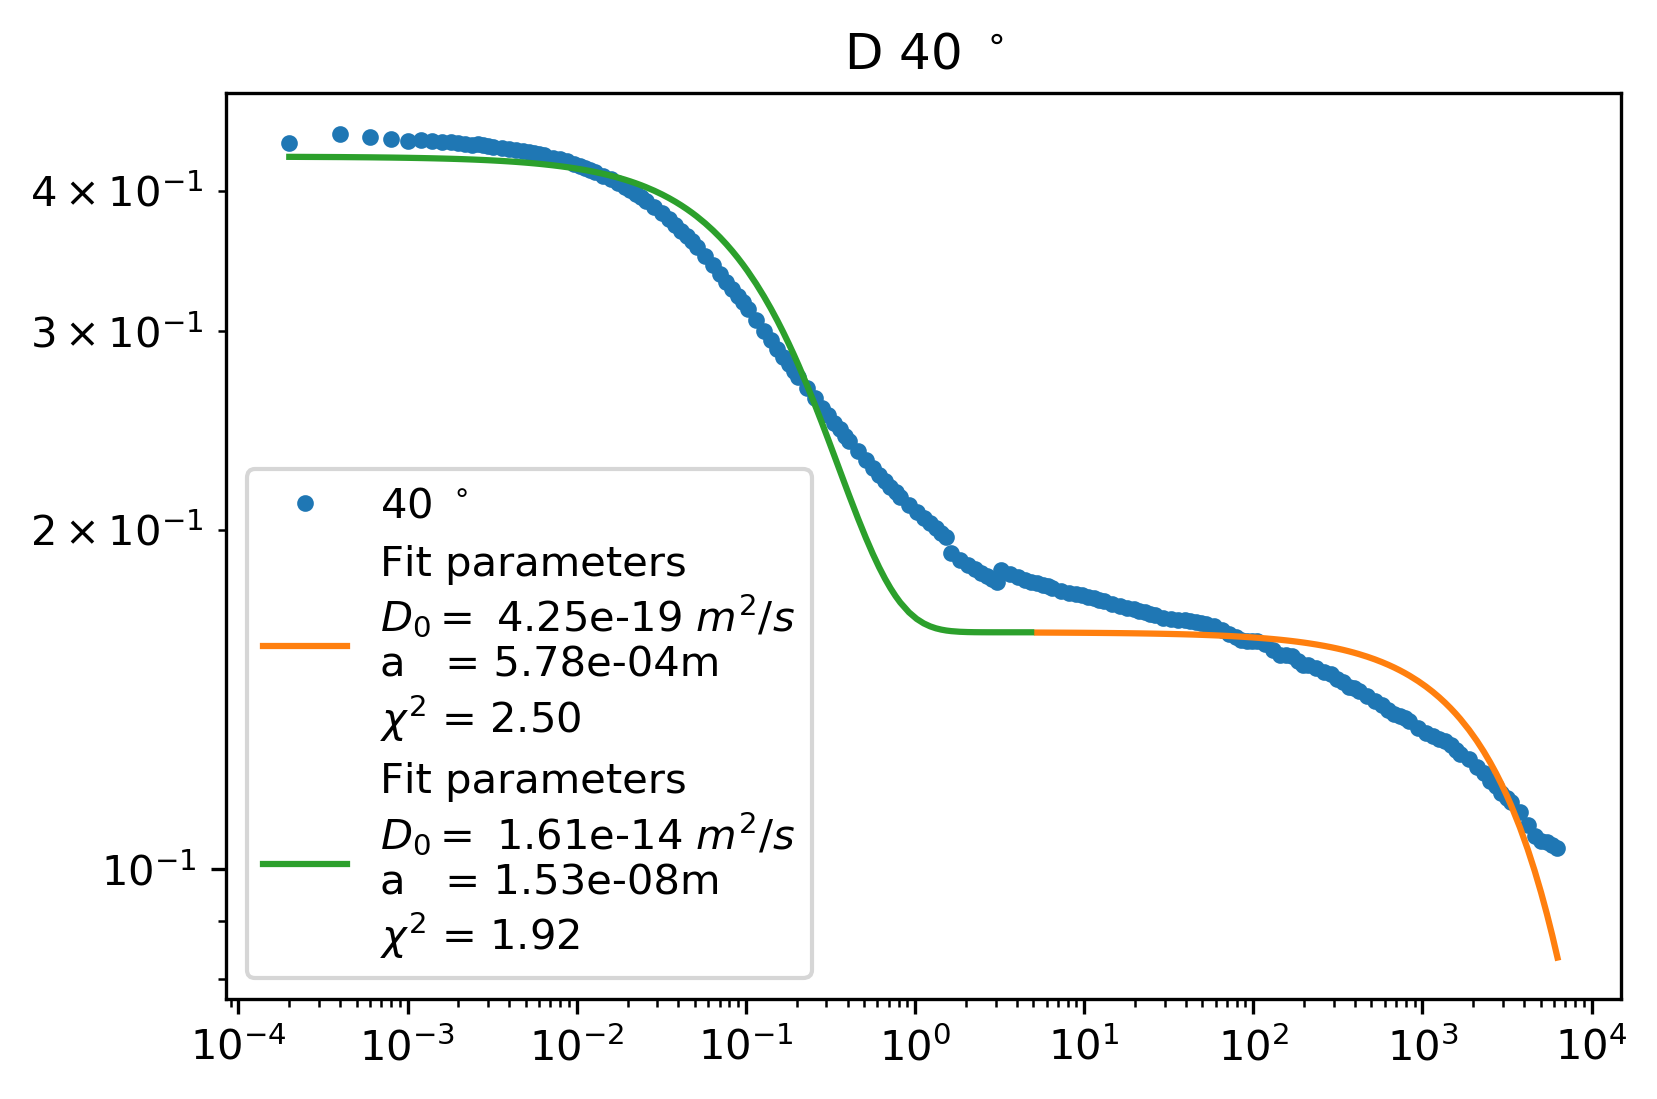

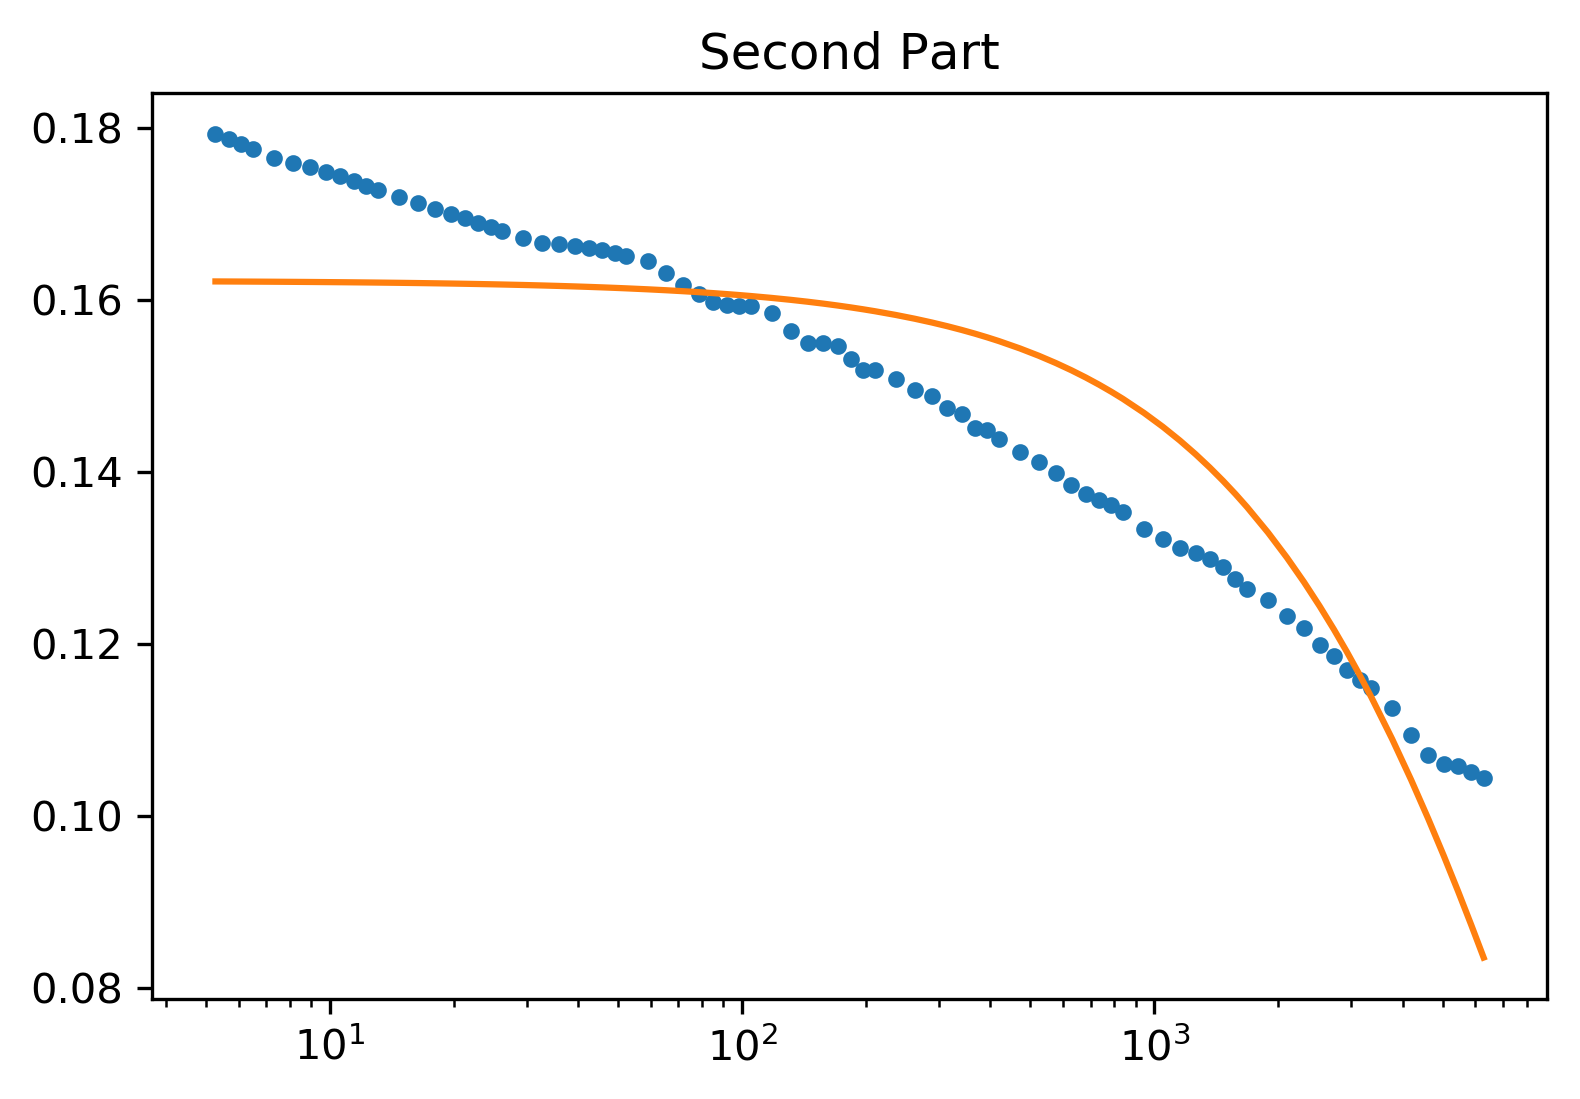

In [316]:

def g2(tau,D,C,q,A):
    return np.exp(-2*q**2*D*tau)*C+A





mean=plotcorr("Data/D.ASC",40,0)

#plotcorr(namelist[0],angels[0],ax)
print(mean)
print(const.Boltzmann*300/(6*np.pi*vi*mean))